# LAB 2 - Desicion trees and data processing

### Section 1 - Make your own data set


In [26]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
data, meta = arff.loadarff('WeeklySpending.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

   Week  Groceries   Rent  Utilities  Transportation  Entertainment  \
0   1.0      150.0  800.0      100.0            50.0           60.0   
1   2.0      160.0  850.0      110.0            55.0           65.0   
2   3.0      155.0  900.0      105.0            52.0           62.0   
3   4.0      158.0  750.0      108.0            54.0           64.0   
4   5.0      162.0  800.0      112.0            56.0           66.0   

   Dining_Out  Sports  Savings  Miscellaneous  InSchool  
0        70.0    30.0    200.0           40.0   b'true'  
1        75.0    35.0    210.0           45.0  b'false'  
2        72.0    32.0    205.0           42.0   b'true'  
3        74.0    34.0    208.0           44.0   b'true'  
4        76.0    36.0    212.0           46.0   b'true'  


In [27]:
#now we need to reformat the b'true' , b'false' to True and False
df['InSchool'] = df['InSchool'].apply(lambda x: True if x == b'true' else False)

print(df.head())

   Week  Groceries   Rent  Utilities  Transportation  Entertainment  \
0   1.0      150.0  800.0      100.0            50.0           60.0   
1   2.0      160.0  850.0      110.0            55.0           65.0   
2   3.0      155.0  900.0      105.0            52.0           62.0   
3   4.0      158.0  750.0      108.0            54.0           64.0   
4   5.0      162.0  800.0      112.0            56.0           66.0   

   Dining_Out  Sports  Savings  Miscellaneous  InSchool  
0        70.0    30.0    200.0           40.0      True  
1        75.0    35.0    210.0           45.0     False  
2        72.0    32.0    205.0           42.0      True  
3        74.0    34.0    208.0           44.0      True  
4        76.0    36.0    212.0           46.0      True  


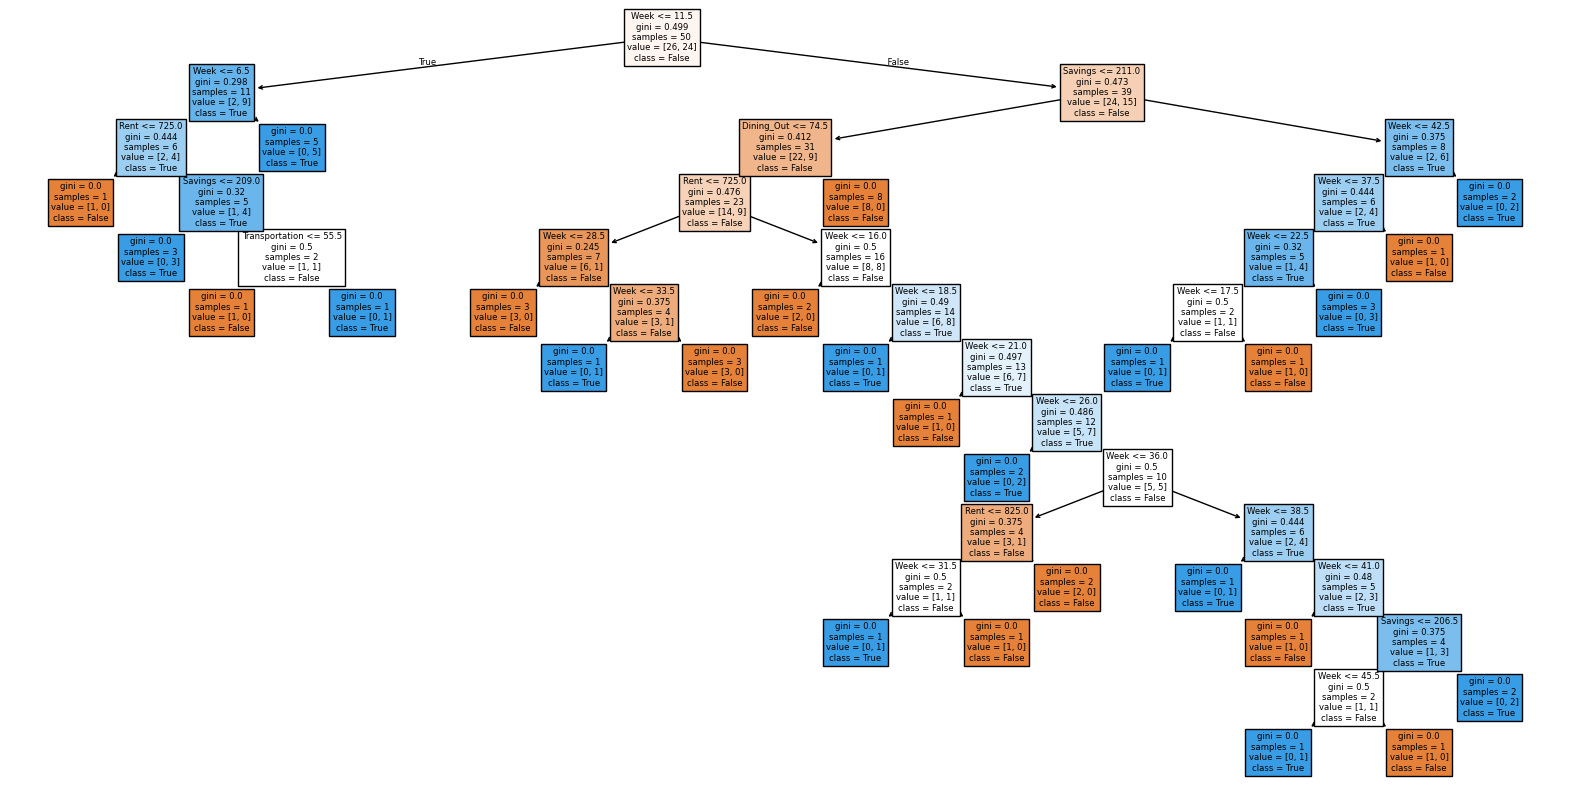

In [28]:
from sklearn import tree

#we shouldn't have to do anymore preprocessing for this one because I made it
#and I know it's clean
# Prepare the feature matrix (X) and target vector (y)
X = df.drop('InSchool', axis=1)
y = df['InSchool']

# Initialize the Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# Fit the model
clf.fit(X, y)

# Display the tree structure
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], filled=True)
plt.show()

*This is an interesting result. Because it is just made up data it actually picked the week as the first splitting attribute. This is still a very interesting tree though and it does successfully categorize all of the data.*

In [29]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    errors.append(1 - scores)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f'Mean error: {mean_error:.2f}')
print(f'Standard deviation of error: {std_error:.2f}')

Mean error: 0.51
Standard deviation of error: 0.17


*Let us discuss this error real quick. Again since this is a more or less randomly generated datasset from me the data doesn't fit a decision tree super well. If I had more standardized the prices of things like rent then this tree would probably be much smaller and also much more accurate. However; for how random I made the data I think that a 48% accuracy is actually not the worst it could be. Now we will start doing some real data sets where we will see trees and error that makes much more sense.*

### Section 2 - kr-vs-kp